In [5]:
import time
import numpy as np
import pandas as pd
import inspect

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from __future__ import print_function


# 0).Install magnitude

In [6]:
# install Magnitude 
!(echo "installing magnitude, please wait\n"; curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)

installing magnitude, please wait\n
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0    545      0 --:--:-- --:--:-- --:--:--   545


In [7]:
# download the pretrained model, the total size is 3.9G
!wget "http://magnitude.plasticity.ai/word2vec/GoogleNews-vectors-negative300.magnitude"

--2020-11-18 22:30:09--  http://magnitude.plasticity.ai/word2vec/GoogleNews-vectors-negative300.magnitude
Resolving magnitude.plasticity.ai (magnitude.plasticity.ai)... 52.216.137.179
Connecting to magnitude.plasticity.ai (magnitude.plasticity.ai)|52.216.137.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4211335168 (3.9G) [application/x-www-form-urlencoded]
Saving to: ‘GoogleNews-vectors-negative300.magnitude.1’

GoogleNews-vectors- 100%[===================>]   3.92G  35.1MB/s    in 1m 55s  

2020-11-18 22:32:05 (34.8 MB/s) - ‘GoogleNews-vectors-negative300.magnitude.1’ saved [4211335168/4211335168]



In [8]:
!pwd

/content


In [9]:
!ls

GoogleNews-vectors-negative300.magnitude    sample_data
GoogleNews-vectors-negative300.magnitude.1


In [10]:
# load the pretrained model
from pymagnitude import Magnitude 
file_path="GoogleNews-vectors-negative300.magnitude"
vectors=Magnitude(file_path)
print(vectors)

In [16]:
# take a look at its attributes
print(len(vectors))
vectors.__dict__

3000000


{'APPROX_MMAP_PROCESS_LOCK': <fasteners.process_lock._FcntlLock at 0x7f1383d525f8>,
 'APPROX_MMAP_THREAD_LOCK': <unlocked _thread.lock object at 0x7f1383d36cb0>,
 'ELMO_O_MMAP_PROCESS_LOCK': <fasteners.process_lock._FcntlLock at 0x7f1383d52c18>,
 'ELMO_O_MMAP_THREAD_LOCK': <unlocked _thread.lock object at 0x7f1383d36ee0>,
 'ELMO_W_MMAP_PROCESS_LOCK': <fasteners.process_lock._FcntlLock at 0x7f1383d525c0>,
 'ELMO_W_MMAP_THREAD_LOCK': <unlocked _thread.lock object at 0x7f1383d36f08>,
 'MMAP_PROCESS_LOCK': <fasteners.process_lock._FcntlLock at 0x7f1383d52710>,
 'MMAP_THREAD_LOCK': <unlocked _thread.lock object at 0x7f1383d36c38>,
 '_all_conns': [<pysqlite2.dbapi2.Connection at 0x7f1383d45490>,
 '_all_vectors': memmap([[ 0.0673199, -0.0534466,  0.0189906, ..., -0.0932472, -0.0073347,
          -0.0051457],
         [ 0.0529562,  0.0654598,  0.0661953, ..., -0.0358558,  0.0108946,
          -0.0470722],
         [-0.008512 , -0.0342245,  0.0322839, ...,  0.0515131, -0.0252273,
           0.0

In [ ]:
Magnitude??

In [17]:
# list the methods that might be helpful and avoid reinventing the wheel.
vector_methods = [method_name for method_name in dir(vectors)
                  if callable(getattr(vectors, method_name))]
vector_methods              

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_create_empty_db',
 '_db',
 '_db_batch_generator',
 '_db_full_result_to_vec',
 '_db_query_similar_keys_vector',
 '_db_query_similarity',
 '_db_result_to_vec',
 '_exclude_set',
 '_handle_pos_neg_args',
 '_is_lm',
 '_iter',
 '_key_for_index',
 '_key_for_index_cached',
 '_key_shrunk_1',
 '_key_shrunk_2',
 '_key_t',
 '_keys_for_indices',
 '_oov_english_stem_english_ixes',
 '_oov_key_t',
 '_oov_stem',
 '_out_of_vocab_vector',
 '_out_of_vocab_vector_cached',
 '_padding_vector',
 '_process_lm_output',
 '_query_is_cached',
 '_query_numpy',
 '_seed',
 '_setup_for_mmap',
 '_string_dist',
 '_vector_for_key',
 '_vector

In [ ]:
inspect.getdoc(vectors.distance)

# 1).What is the dimensionality of these word embeddings? Provide an integer answer.

In [ ]:
print('dim of a vector: {}'.format(vectors.dim)) #300
print('length of a vector: {}'.format(len(vectors))) #3000000

In [ ]:
print('type of values returned from vectors.query():{}'.format(type(vectors.query('cat'))))
print('\nlength of the vector returned: {}\n'.format(len(vectors.query("cat"))))
print(vectors.query("cat"))

# 2). What are the top-5 most similar words to picnic (not including picnic itself)?

In [ ]:
vectors.most_similar("picnic", topn = 5) #  the top-5 most similar words to picnic. 

In [ ]:
vectors.most_similar??

In [ ]:
vectors.distance('picnic','picnics')

In [ ]:
vectors.most_similar??

In [ ]:
vectors.most_similar(vectors.query("picnic"), topn = 6) # the top-5 most similar words by vector

In [ ]:
vectors.most_similar_cosmul??

In [ ]:
vectors.closer_than("picnic", "picnics") #

# 3).According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus','manila', 'newsprint', 'parchment', 'gazette']

In [ ]:
vectors.doesnt_match(['tissue', 'papyrus','manila', 'newsprint', 'parchment', 'gazette']) # tissue

In [ ]:
vectors.most_similar_to_given("cat", ["dog", "television", "laptop"])

vectors.most_similar_to_given??

# 4).Solve the following analogy: leg is to jump as X is to throw.


## notes: 
### (1).For 𝑘𝑖𝑛𝑔−𝑚𝑎𝑛+𝑤𝑜𝑚𝑎𝑛=𝑞𝑢𝑒𝑒𝑛 they claimed that the closest word vector to 𝑘𝑖𝑛𝑔−𝑚𝑎𝑛+𝑤𝑜𝑚𝑎𝑛 is 𝑞𝑢𝑒𝑒𝑛;
### (2).Woman and king is positive



In [ ]:
vectors.most_similar(positive = ["leg", "throw"], negative = ["jump"]) # forearm

In [ ]:
vectors.most_similar_cosmul(positive = ["leg", "throw"], negative = ["jump"]) # forearm

In [ ]:
# The one I am using does not support 'most_similar_approx'
# vectors.most_similar_approx(positive = ["woman", "king"], negative = ["man"])


[('picnics', 0.7400875), ('picnic_lunch', 0.721374), ('Picnic', 0.700534), ('potluck_picnic', 0.6683274), ('picnic_supper', 0.65189123), ('picnicking', 0.63550216), ('cookout', 0.63243484), ('Hiking_biking_camping', 0.6256069), ('barbeque', 0.62256277), ('barbecue', 0.6195759), ('picnic_lunches', 0.6143184), ('pig_roast', 0.61019313), ('Bring_picnic', 0.6033048), ('potluck', 0.60114384), ('picnic_tables', 0.6006263), ('Hawaiian_luau', 0.5982951), ('wiener_roast', 0.59388626), ('potluck_dinner', 0.5916978), ('fish_fry', 0.58994764), ('gazebo', 0.58934724), ('teddy_bear_picnic', 0.5891956), ('picnic_table', 0.58790123), ('potluck_lunch', 0.5856319), ('potluck_barbecue', 0.58500683), ('brunch', 0.5848722), ('blankets_lawn_chairs', 0.5800308), ('ox_roast', 0.57900274), ('shaded_picnic', 0.57885706), ('Easter_egg_hunt', 0.5787928), ('weiner_roast', 0.5769961), ('Easter_egg_hunts', 0.57512593), ('potluck_meal', 0.5742372), ('Picnics', 0.5731207), ('potluck_supper', 0.56369483), ('cookouts', 

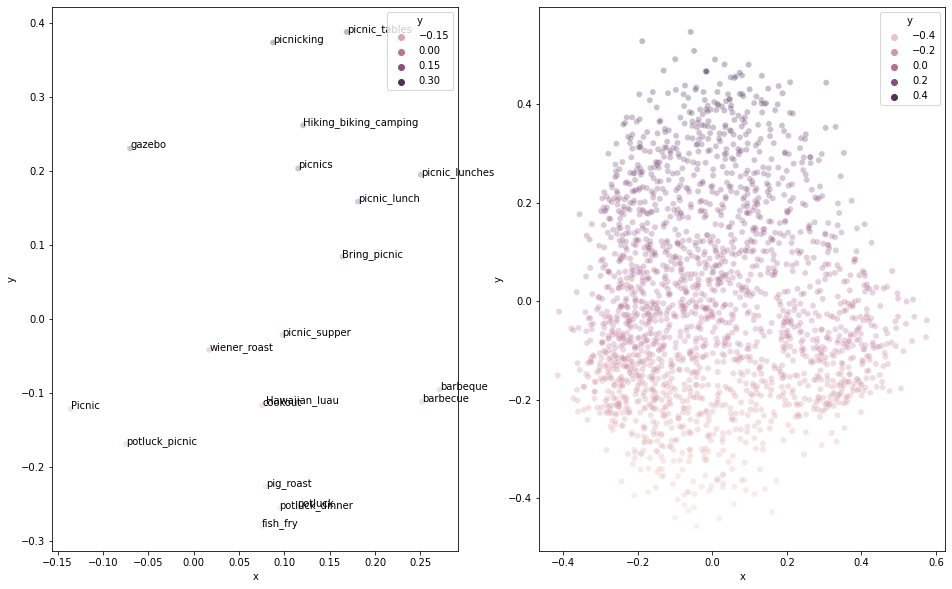

In [36]:
def visualization(word_list):
    pca = PCA(n_components = 2)
    # sne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    w_list = []
    i = 1
    for word in word_list:
      pca = PCA(n_components = 2)
      vect = vectors.query(word)
      w_list.append(vect)
    result = pca.fit_transform(w_list)
    # result = pca.fit_transform(w_list)
    x = result[:,0]
    y = result[:,1]
    label=word_list
    attribute_dict={'x':x, 'y':y,'label':label}
    df = pd.DataFrame.from_dict(attribute_dict)
    plt.figure(figsize=(16,10))
    ax1 = plt.subplot(1,2,1)
    sns.scatterplot(
        x="x", y="y",
        hue="y",
        data=df.copy().head(20),
        alpha=0.3
    )
    for i, txt in enumerate(df.copy().head(20).label):
        ax1.annotate(txt, (x[i], y[i]))

    ax2 = plt.subplot(1,2,2)
    sns.scatterplot(
        x="x", y="y",
        hue="y",
        data=df,
        alpha=0.3
    )
    # for i, txt in enumerate(df.label):
    #     ax1.annotate(txt, (x[i], y[i]))
    # for j in range(len(word_list)):
    #     ax.text(x[j],y[j],word_list[j],fontsize=12,color='r')
    # ax.scatter(x,y)
    # plt.savefig('top20.eps')

list_of_kv=vectors.most_similar("picnic", topn = 20000)
print(list_of_kv)
word_list = [tup[0] for tup in list_of_kv]
print(word_list)
visualization(word_list)

[('picnics', 0.7400875), ('picnic_lunch', 0.721374), ('Picnic', 0.700534), ('potluck_picnic', 0.6683274), ('picnic_supper', 0.65189123), ('picnicking', 0.63550216), ('cookout', 0.63243484), ('Hiking_biking_camping', 0.6256069), ('barbeque', 0.62256277), ('barbecue', 0.6195759), ('picnic_lunches', 0.6143184), ('pig_roast', 0.61019313), ('Bring_picnic', 0.6033048), ('potluck', 0.60114384), ('picnic_tables', 0.6006263), ('Hawaiian_luau', 0.5982951), ('wiener_roast', 0.59388626), ('potluck_dinner', 0.5916978), ('fish_fry', 0.58994764), ('gazebo', 0.58934724), ('teddy_bear_picnic', 0.5891956), ('picnic_table', 0.58790123), ('potluck_lunch', 0.5856319), ('potluck_barbecue', 0.58500683), ('brunch', 0.5848722), ('blankets_lawn_chairs', 0.5800308), ('ox_roast', 0.57900274), ('shaded_picnic', 0.57885706), ('Easter_egg_hunt', 0.5787928), ('weiner_roast', 0.5769961), ('Easter_egg_hunts', 0.57512593), ('potluck_meal', 0.5742372), ('Picnics', 0.5731207), ('potluck_supper', 0.56369483), ('cookouts', 

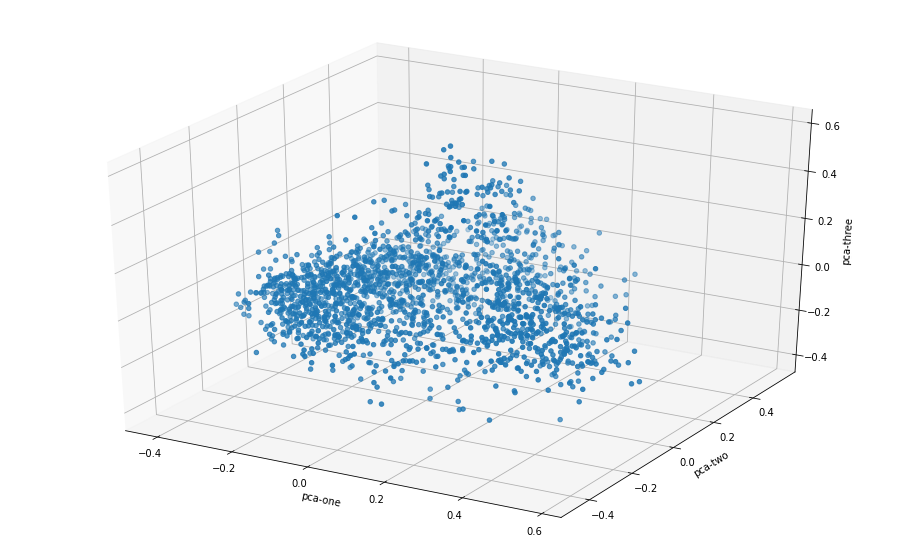

In [40]:
def visualization(word_list):
    pca = PCA(n_components = 3)
    # sne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    w_list = []
    i = 1
    for word in word_list:
      vect = vectors.query(word)
      w_list.append(vect)
    result = pca.fit_transform(w_list)
    # result = pca.fit_transform(w_list)
    x = result[:,0]
    y = result[:,1]
    z = result[:, 2]
    label=word_list
    attribute_dict={'x':x, 'y':y, 'z':z,'label':label}
    df = pd.DataFrame.from_dict(attribute_dict)
    ax = plt.figure(figsize=(16,10)).gca(projection='3d')
    ax.scatter(
        xs=df.x,
        ys=df.y,
        zs=df.z,
        cmap='tab10'
    )
    ax.set_xlabel('pca-one')
    ax.set_ylabel('pca-two')
    ax.set_zlabel('pca-three')
    plt.show()

    # for i, txt in enumerate(df.label):
    #     ax1.annotate(txt, (x[i], y[i]))
    # for j in range(len(word_list)):
    #     ax.text(x[j],y[j],word_list[j],fontsize=12,color='r')
    # ax.scatter(x,y)
    # plt.savefig('top20.eps')

list_of_kv=vectors.most_similar("picnic", topn = 2000)
print(list_of_kv)
word_list = [tup[0] for tup in list_of_kv]
print(word_list)
visualization(word_list)

[('picnics', 0.7400875), ('picnic_lunch', 0.721374), ('Picnic', 0.700534), ('potluck_picnic', 0.6683274), ('picnic_supper', 0.65189123), ('picnicking', 0.63550216), ('cookout', 0.63243484), ('Hiking_biking_camping', 0.6256069), ('barbeque', 0.62256277), ('barbecue', 0.6195759), ('picnic_lunches', 0.6143184), ('pig_roast', 0.61019313), ('Bring_picnic', 0.6033048), ('potluck', 0.60114384), ('picnic_tables', 0.6006263), ('Hawaiian_luau', 0.5982951), ('wiener_roast', 0.59388626), ('potluck_dinner', 0.5916978), ('fish_fry', 0.58994764), ('gazebo', 0.58934724), ('teddy_bear_picnic', 0.5891956), ('picnic_table', 0.58790123), ('potluck_lunch', 0.5856319), ('potluck_barbecue', 0.58500683), ('brunch', 0.5848722), ('blankets_lawn_chairs', 0.5800308), ('ox_roast', 0.57900274), ('shaded_picnic', 0.57885706), ('Easter_egg_hunt', 0.5787928), ('weiner_roast', 0.5769961), ('Easter_egg_hunts', 0.57512593), ('potluck_meal', 0.5742372), ('Picnics', 0.5731207), ('potluck_supper', 0.56369483), ('cookouts', 

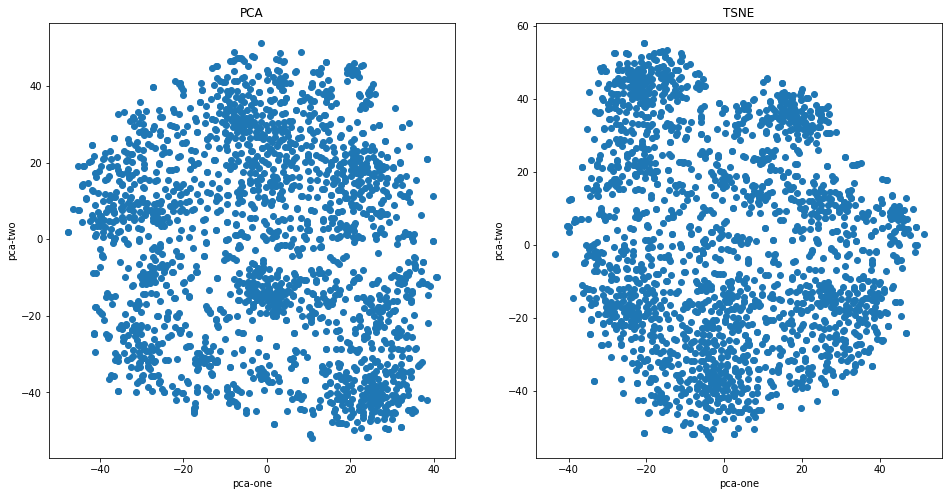

In [68]:
def visualization_2d(model_2, word_list):
    def prepare_data(model_inst, n_components, word_list):
        model_instance = model_inst(n_components)
        # sne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        w_list = []
        i = 1
        for word in word_list:
          vect = vectors.query(word)
          w_list.append(vect)
        result = model_instance.fit_transform(w_list)
        x = result[:,0]
        y = result[:,1]
        label=word_list
        attribute_dict={'x':x, 'y':y, 'label':label}
        df = pd.DataFrame.from_dict(attribute_dict)
        return df
    plt.figure(figsize=(16,8))
    for i, (model_name_str, model_setup) in enumerate(model_2.items()):
        model_inst, n_components = model_setup
        df = prepare_data(model_inst, n_components, word_list)
        ax = plt.subplot(1, 2, i+1)
        ax.scatter(x=df.x, y=df.y, cmap='tab10')
        ax.set_xlabel('pca-one')
        ax.set_ylabel('pca-two')
        ax.set_title(model_name_str)
    plt.show()

model_2 = {'PCA':[PCA, 2],'TSNE':[TSNE,2]}
model_3 = {'PCA':[PCA, 3],'TSNE':[TSNE,3]}

list_of_kv=vectors.most_similar("picnic", topn = 2000)
print(list_of_kv)
word_list = [tup[0] for tup in list_of_kv]
print(word_list)

visualization_2d(model_2, word_list)

before calling: <class 'sklearn.decomposition._pca.PCA'>
in function: PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
before calling: <class 'sklearn.manifold._t_sne.TSNE'>
in function: TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=3, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)


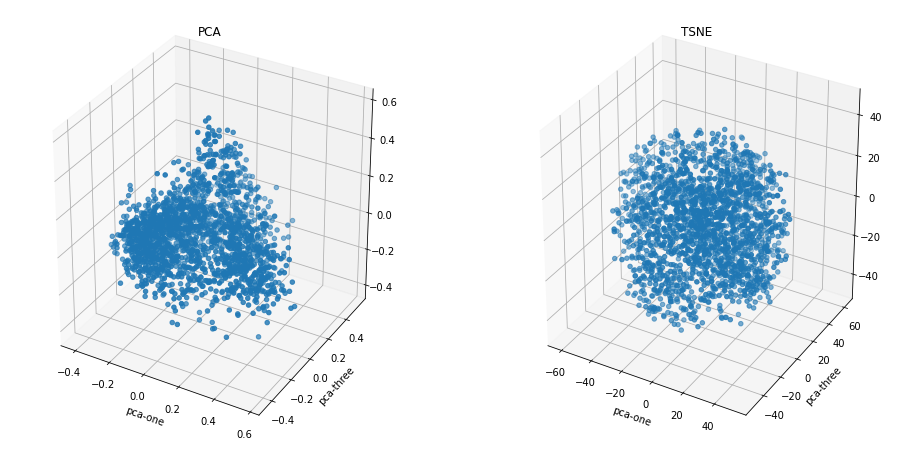

In [81]:
def visualization_3d(model_2, word_list):
    def prepare_data(model_inst, n_components, word_list):
        model_instance = model_inst(n_components)
        print('in function:',model_instance)
        # sne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        w_list = []
        i = 1
        for word in word_list:
          vect = vectors.query(word)
          w_list.append(vect)
        result = model_instance.fit_transform(w_list)
        x = result[:,0]
        y = result[:,1]
        z = result[:,2]
        label=word_list
        attribute_dict={'x':x, 'y':y,'z':z, 'label':label}
        df = pd.DataFrame.from_dict(attribute_dict)
        return df
    plt.figure(figsize=(16,8))
    for i, (model_name_str, model_setup) in enumerate(model_2.items()):
        model_inst, n_components = model_setup
        print('before calling:',model_inst)
        df = prepare_data(model_inst, n_components, word_list)
        ax = plt.subplot(1, 2, i+1,projection='3d')
        ax.scatter(xs=df.x, ys=df.y,zs=df.z, cmap='tab10')
        ax.set_xlabel('pca-one')
        ax.set_ylabel('pca-two')
        ax.set_ylabel('pca-three')
        ax.set_title(model_name_str)
    plt.show()

model_3 = {'PCA':[PCA, 3],'TSNE':[TSNE,3]}
list_of_kv=vectors.most_similar("picnic", topn = 2000)
# print(list_of_kv)
word_list = [tup[0] for tup in list_of_kv]
# print(word_list)

visualization_3d(model_3, word_list)